In [2]:
import pandas as pd
import numpy as np
import seaborn as sls
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Data/Raw/archive/Iris.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.shape

(150, 6)

In [20]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df = df.drop("Id", axis=1)

In [9]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

KNN Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0


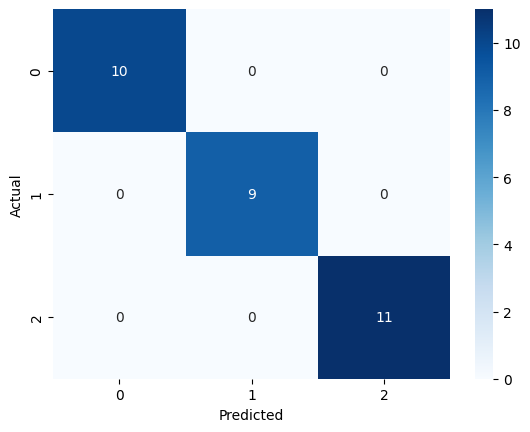

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, knn_pred)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=5)
print("Cross Validation Accuracy:", scores.mean())

Cross Validation Accuracy: 0.9666666666666668


Conclusion:

In this project, multiple classification algorithms were applied to the Iris dataset to predict flower species based on sepal and petal measurements.
After preprocessing the data and applying feature scaling, three models were trained: K-Nearest Neighbors, Logistic Regression, and Decision Tree.
All models achieved high accuracy due to the well-separated nature of the dataset. Cross-validation confirmed that the models generalize well to unseen data.
Among the models tested, KNN and Logistic Regression demonstrated consistent performance, while Decision Tree showed slightly more variance depending on the split.
This project demonstrates the fundamental concepts of supervised learning, classification, model evaluation, and performance comparison.

In [19]:
!pip freeze > requirements.txt

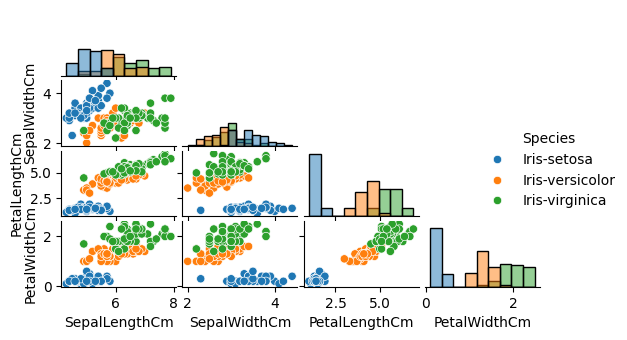

In [28]:
g = sns.pairplot(
    df,
    hue="Species",
    diag_kind="hist",
    corner=True
)

g.fig.set_size_inches(6, 3)
plt.show()